# Comparison of Gages and HEC-RAS Model Results for Harvey

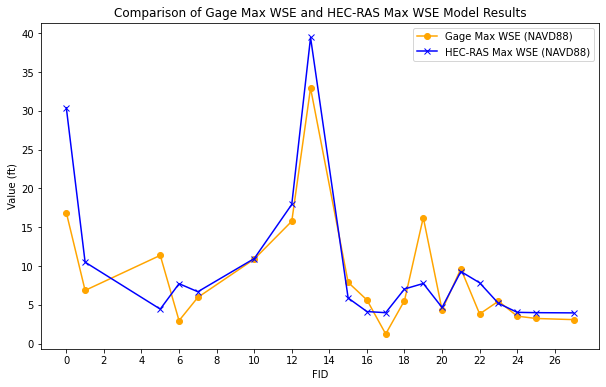

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = "S:\For_Angshuman\LWI_2024\LWI_Calibration\Extracted_results\Extracted_HWMs_RasterWSEmax.csv"  # Update this path to the correct CSV file path
df = pd.read_csv(csv_path)

# Manually replace -9999 with NaN in the specific columns
df['raster_val'] = df['raster_val'].replace(-9999, np.nan)
df['WSEmax'] = df['WSEmax'].replace(-9999, np.nan)

# Drop NaN values for accurate statistics
matched_df = df.dropna(subset=['raster_val', 'WSEmax'])

# Prepare the data for plotting
x = matched_df['FID'].values  # Convert to numpy array if needed
y_raster_val = matched_df['raster_val'].values
y_WSEmax = matched_df['WSEmax'].values

# Create the plot
plt.figure(figsize=(10, 6))

# Plot WSEmax values
plt.plot(x, y_WSEmax, label='Gage Max WSE (NAVD88)', marker='o', linestyle='-', color='orange')

# Plot raster_val values
plt.plot(x, y_raster_val, label='HEC-RAS Max WSE (NAVD88)', marker='x', linestyle='-', color='blue')

# Adding titles and labels
plot_title = 'Comparison of Gage Max WSE and HEC-RAS Max WSE Model Results'
plt.title(plot_title)
plt.xlabel('FID')
plt.ylabel('Value (ft)')
plt.legend()

# Set x-ticks with a distance of 2 units
plt.xticks(np.arange(0, max(x) + 1, step=2))

plt.grid(False)

# Show the plot
plt.show()


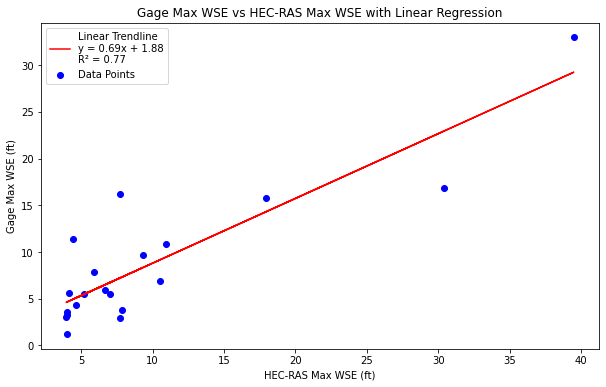

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os

# Prepare the data for linear regression
x = matched_df['raster_val'].values.reshape(-1, 1)
y = matched_df['WSEmax'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Get the linear regression line
y_pred = model.predict(x)

# Calculate the R² value
r2 = r2_score(y, y_pred)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(x, y, label='Data Points', color='blue')

# Plot the linear trendline
plt.plot(x, y_pred, color='red', label=f'Linear Trendline\ny = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\nR² = {r2:.2f}')

# Adding titles and labels
plt.title('Gage Max WSE vs HEC-RAS Max WSE with Linear Regression')
plt.xlabel('HEC-RAS Max WSE (ft)')
plt.ylabel('Gage Max WSE (ft)')
plt.legend()
plt.grid(False)

# Show the plot
plt.show()

In [15]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Manually replace -9999 with NaN in the specific columns
df['raster_val'] = df['raster_val'].replace(-9999, np.nan)
df['WSEmax'] = df['WSEmax'].replace(-9999, np.nan)

# Drop NaN values for accurate statistics
matched_df = df.dropna(subset=['raster_val', 'WSEmax'])

# Assuming x is HEC-RAS Max WSE values and y is Gage Max WSE values
x = matched_df['raster_val'].values.flatten()
y = matched_df['WSEmax'].values

# Fit the linear regression model for R² calculation
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

# Get the predicted values from the linear regression
y_pred = model.predict(x.reshape(-1, 1))

# Calculate the R² value
r2 = r2_score(y, y_pred)

# Calculate RMSE directly from observed and simulated values
rmse = np.sqrt(np.mean((y - x) ** 2))

# Calculate PBIAS directly from observed and simulated values
pbias = 100 * (np.sum(y - x) / np.sum(y))

# Calculate NSE directly from observed and simulated values
nse = 1 - (np.sum((y - x) ** 2) / np.sum((y - np.mean(y)) ** 2))

# Calculate Min difference, Max difference, Mean difference, and Standard Deviation of difference directly between x and y
differences = y - x
min_diff = np.min(differences)
max_diff = np.max(differences)
mean_diff = np.mean(differences)
std_diff = np.std(differences)

# Print calculated statistics
print(f"RMSE: {rmse:.2f}")
print(f"PBIAS: {pbias:.2f}%")
print(f"NSE: {nse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Min Difference (Gage Max WSE – HEC-RAS Max WSE) ft: {min_diff:.2f}")
print(f"Max Difference (Gage Max WSE – HEC-RAS Max WSE) ft: {max_diff:.2f}")
print(f"Mean Difference (Gage Max WSE – HEC-RAS Max WSE) ft: {mean_diff:.2f}")
print(f"Standard Deviation of Difference (Gage Max WSE – HEC-RAS Max WSE) ft: {std_diff:.2f}")


RMSE: 4.59
PBIAS: -13.00%
NSE: 0.59
R²: 0.77
Min Difference (Gage Max WSE – HEC-RAS Max WSE) ft: -13.52
Max Difference (Gage Max WSE – HEC-RAS Max WSE) ft: 8.51
Mean Difference (Gage Max WSE – HEC-RAS Max WSE) ft: -1.13
Standard Deviation of Difference (Gage Max WSE – HEC-RAS Max WSE) ft: 4.45


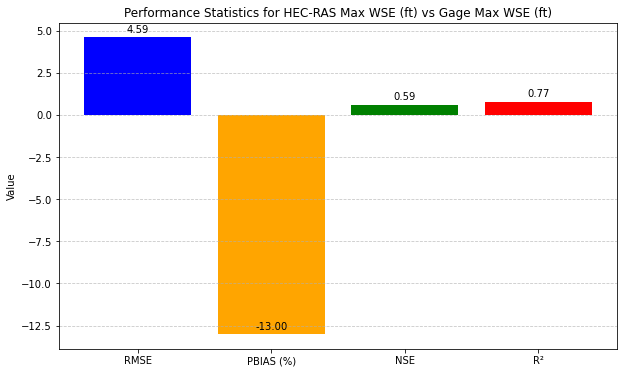

In [17]:
# Visualize the statistics
stats = {
    'RMSE': rmse,
    'PBIAS (%)': pbias,
    'NSE': nse,
    'R²': r2
}

# Create a bar plot for the statistics
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(stats.keys(), stats.values(), color=['blue', 'orange', 'green', 'red'])

# Adding titles and labels
plt.title('Performance Statistics for HEC-RAS Max WSE (ft) vs Gage Max WSE (ft)')
plt.ylabel('Value')

# Adding data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
import pandas as pd
import geopandas as gpd
import folium


# Manually replace -9999 with NaN in the specific columns
df['raster_val'] = df['raster_val'].replace(-9999, np.nan)
df['WSEmax'] = df['WSEmax'].replace(-9999, np.nan)

# Drop NaN values for accurate statistics
matched_df = df.dropna(subset=['raster_val', 'WSEmax'])

# Prepare a GeoDataFrame
gdf = gpd.GeoDataFrame(
    matched_df,
    geometry=gpd.points_from_xy(matched_df.longitude, matched_df.latitude)
)

# Create a Folium map
m = folium.Map(location=[matched_df['latitude'].mean(), matched_df['longitude'].mean()], zoom_start=8)

# Add points to the map
for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=(
            f"Gage ID: {row['USGSGageID']}<br>"
            f"Max Observed WSE: {row['WSEmax']} ft<br>"
            f"Max Modeled WSE: {row['raster_val']} ft"
        ),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Save the map to an HTML file
m.save('gage_wse_comparison_map.html')

# Display the map (only works in Jupyter Notebooks)
m


C:\Users\asaharia\AppData\Roaming\Python\Python39\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
<ipython-input-18-728f90c00536>:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using Py

## Gage time series analysis for Harvey

In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Load the CSV file
file_path = "S:\For_Angshuman\GLO\HECRASV6.5_BaseModel\Harvey_Gage_RAS_Simulation_data.csv"
df = pd.read_csv(file_path)

# Extract the observed and simulated values
observed = df['Observed Water Surface Elevation (ft)'].values
simulated = df['Simulated Water Surface Elevation (ft)'].values

# Filter out rows where observed or simulated values are NaN
valid_indices = ~np.isnan(observed) & ~np.isnan(simulated)
observed = observed[valid_indices]
simulated = simulated[valid_indices]

# Calculate RMSE
rmse = np.sqrt(np.mean((observed - simulated) ** 2))

# Calculate PBIAS
pbias = 100 * (np.sum(observed - simulated) / np.sum(observed))

# Calculate NSE
nse = 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

# Fit the linear regression model for R² calculation
model = LinearRegression()
model.fit(simulated.reshape(-1, 1), observed)

# Get the predicted values from the linear regression
observed_pred = model.predict(simulated.reshape(-1, 1))

# Calculate the R² value
r2 = r2_score(observed, observed_pred)

# Calculate Min difference, Max difference, Mean difference, and Standard Deviation of difference
differences = observed - simulated
min_diff = np.min(differences)
max_diff = np.max(differences)
mean_diff = np.mean(differences)
std_diff = np.std(differences)

# Print calculated statistics
print(f"RMSE: {rmse:.2f}")
print(f"PBIAS: {pbias:.2f}%")
print(f"NSE: {nse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Min Difference (Observed - Simulated) ft: {min_diff:.2f}")
print(f"Max Difference (Observed - Simulated) ft: {max_diff:.2f}")
print(f"Mean Difference (Observed - Simulated) ft: {mean_diff:.2f}")
print(f"Standard Deviation of Difference (Observed - Simulated) ft: {std_diff:.2f}")


RMSE: 1.40
PBIAS: -22.52%
NSE: 0.27
R²: 0.81
Min Difference (Observed - Simulated) ft: -2.64
Max Difference (Observed - Simulated) ft: 2.04
Mean Difference (Observed - Simulated) ft: -1.16
Standard Deviation of Difference (Observed - Simulated) ft: 0.79


RMSE: 1.40
PBIAS: -22.52%
NSE: 0.27
R²: 0.81
Min Difference (Observed - Simulated) ft: -2.64
Max Difference (Observed - Simulated) ft: 2.04
Mean Difference (Observed - Simulated) ft: -1.16
Standard Deviation of Difference (Observed - Simulated) ft: 0.79


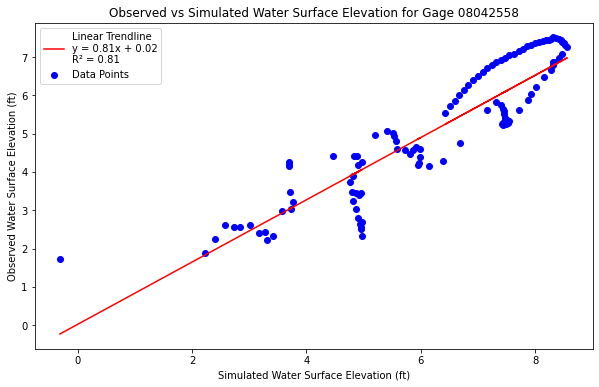

In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "S:\\For_Angshuman\\GLO\\HECRASV6.5_BaseModel\\Harvey_Gage_RAS_Simulation_data.csv"
df = pd.read_csv(file_path)

# Extract the observed and simulated values
observed = df['Observed Water Surface Elevation (ft)'].values
simulated = df['Simulated Water Surface Elevation (ft)'].values

# Filter out rows where observed or simulated values are NaN
valid_indices = ~np.isnan(observed) & ~np.isnan(simulated)
observed = observed[valid_indices]
simulated = simulated[valid_indices]

# Calculate RMSE
rmse = np.sqrt(np.mean((observed - simulated) ** 2))

# Calculate PBIAS
pbias = 100 * (np.sum(observed - simulated) / np.sum(observed))

# Calculate NSE
nse = 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

# Fit the linear regression model for R² calculation
model = LinearRegression()
model.fit(simulated.reshape(-1, 1), observed)

# Get the predicted values from the linear regression
observed_pred = model.predict(simulated.reshape(-1, 1))

# Calculate the R² value
r2 = r2_score(observed, observed_pred)

# Calculate Min difference, Max difference, Mean difference, and Standard Deviation of difference
differences = observed - simulated
min_diff = np.min(differences)
max_diff = np.max(differences)
mean_diff = np.mean(differences)
std_diff = np.std(differences)

# Print calculated statistics
print(f"RMSE: {rmse:.2f}")
print(f"PBIAS: {pbias:.2f}%")
print(f"NSE: {nse:.2f}")
print(f"R²: {r2:.2f}")
print(f"Min Difference (Observed - Simulated) ft: {min_diff:.2f}")
print(f"Max Difference (Observed - Simulated) ft: {max_diff:.2f}")
print(f"Mean Difference (Observed - Simulated) ft: {mean_diff:.2f}")
print(f"Standard Deviation of Difference (Observed - Simulated) ft: {std_diff:.2f}")

# Plot observed vs. simulated
plt.figure(figsize=(10, 6))
plt.scatter(simulated, observed, label='Data Points', color='blue')
plt.plot(simulated, observed_pred, color='red', label=f'Linear Trendline\ny = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\nR² = {r2:.2f}')
plt.title('Observed vs Simulated Water Surface Elevation for Gage 08042558')
plt.xlabel('Simulated Water Surface Elevation (ft)')
plt.ylabel('Observed Water Surface Elevation (ft)')
plt.legend()
plt.grid(False)
plt.show()


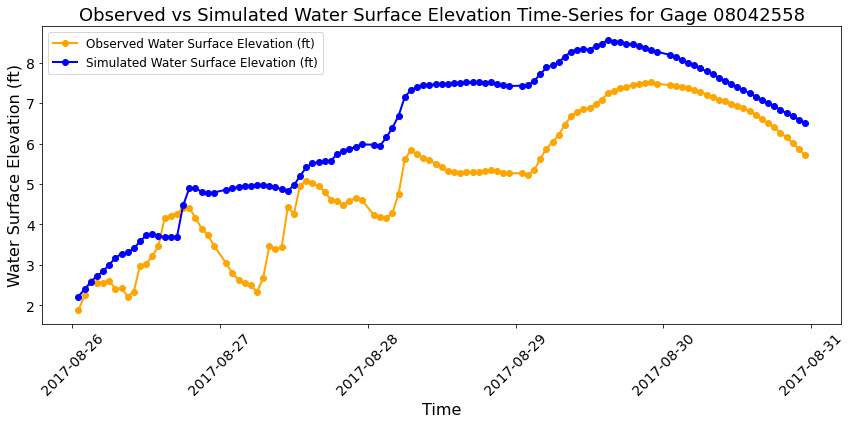

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "S:\\For_Angshuman\\GLO\\HECRASV6.5_BaseModel\\Harvey_Gage_RAS_Simulation_data.csv"
df = pd.read_csv(file_path)

# Function to clean date strings
def clean_date_string(date_str):
    return date_str.strip().replace('  ', ' ')

# Apply the function to clean date strings
df['Time and Date'] = df['Time and Date'].apply(clean_date_string)

# Convert the 'Time and Date' column to datetime
df['Time and Date'] = pd.to_datetime(df['Time and Date'], format='%d%b%Y %H%M', errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Time and Date'])

# Extract the observed and simulated values along with the time
time = df['Time and Date'].values
observed = df['Observed Water Surface Elevation (ft)'].values
simulated = df['Simulated Water Surface Elevation (ft)'].values

# Filter out rows where observed or simulated values are NaN
valid_indices = ~np.isnan(observed) & ~np.isnan(simulated)
time = time[valid_indices]
observed = observed[valid_indices]
simulated = simulated[valid_indices]

# Plot both time-series
plt.figure(figsize=(12, 6))

# Plot observed water surface elevation
plt.plot(time, observed, label='Observed Water Surface Elevation (ft)', marker='o', linestyle='-', color='orange', markersize=6, linewidth=2)

# Plot simulated water surface elevation
plt.plot(time, simulated, label='Simulated Water Surface Elevation (ft)', marker='o', linestyle='-', color='blue', markersize=6, linewidth=2)

# Adding titles and labels
plt.title('Observed vs Simulated Water Surface Elevation Time-Series for Gage 08042558', fontsize=18)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Water Surface Elevation (ft)', fontsize=16)
plt.legend(fontsize=12)
plt.grid(False)


# Improve x-axis and y-axis tick labels
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


Fetching USGS Gage Data

In [42]:
import requests
import pandas as pd
from datetime import datetime

def fetch_usgs_gage_data(gage_id, start_date, end_date, parameter_code='00065'):
    """
    Fetch water level data from USGS for a specific gage ID and time period.
    
    Parameters:
    - gage_id (str): The USGS gage ID.
    - start_date (str): Start date in 'YYYY-MM-DD' format.
    - end_date (str): End date in 'YYYY-MM-DD' format.
    - parameter_code (str): The parameter code for the data (default is '00065' for gage height).
    
    Returns:
    - pd.DataFrame: DataFrame containing the fetched data.
    """
    base_url = "https://waterservices.usgs.gov/nwis/iv/"
    params = {
        'format': 'json',
        'sites': gage_id,
        'startDT': start_date,
        'endDT': end_date,
        'parameterCd': parameter_code,
        'siteStatus': 'all'
    }
    
    response = requests.get(base_url, params=params)
    
    try:
        response.raise_for_status()  # Raise an exception for HTTP errors
    except requests.exceptions.HTTPError as e:
        print(f"HTTPError: {e}")
        return pd.DataFrame()
    
    data = response.json()
    
    try:
        time_series = data['value']['timeSeries'][0]
    except (KeyError, IndexError):
        print(f"No data found for gage ID {gage_id} in the given time period.")
        return pd.DataFrame()

    if 'value' in time_series['values'][0]:
        records = time_series['values'][0]['value']
        df = pd.DataFrame(records)
        df['datetime'] = pd.to_datetime(df['dateTime'])
        df['value'] = pd.to_numeric(df['value'])
        df.drop(columns=['qualifiers'], inplace=True)
        return df
    else:
        print(f"No data found for gage ID {gage_id} in the given time period.")
        return pd.DataFrame()

def download_gage_data(gage_ids, start_date, end_date):
    """
    Download water level data and metadata for multiple USGS gage IDs over a specific time period.
    
    Parameters:
    - gage_ids (list): List of USGS gage IDs.
    - start_date (str): Start date in 'YYYY-MM-DD' format.
    - end_date (str): End date in 'YYYY-MM-DD' format.
    
    Returns:
    - dict: Dictionary containing gage ID as keys and corresponding data and metadata.
    """
    gage_data = {}
    for gage_id in gage_ids:
        print(f"Fetching data for gage ID: {gage_id}")
        data = fetch_usgs_gage_data(gage_id, start_date, end_date)
        metadata = fetch_usgs_gage_metadata(gage_id)
        gage_data[gage_id] = {'data': data, 'metadata': metadata}
    return gage_data

# Example usage for Part 1
if __name__ == "__main__":
    gage_ids = ["08012000", "07380120"]
    start_date = "2020-08-24"
    end_date = "2020-09-02"
    
    gage_data = download_gage_data(gage_ids, start_date, end_date)
    
    for gage_id, info in gage_data.items():
        print(f"\nData for gage ID {gage_id}:")
        print(info['data'].head())
        if not info['data'].empty:
            max_value = info['data']['value'].max()
            print(f"Maximum value for gage ID {gage_id} over the period {start_date} to {end_date}: {max_value}")


Fetching data for gage ID: 08012000
Fetching data for gage ID: 07380120

Data for gage ID 08012000:
   value                       dateTime                  datetime
0   2.23  2020-08-24T00:00:00.000-05:00 2020-08-24 00:00:00-05:00
1   2.23  2020-08-24T00:15:00.000-05:00 2020-08-24 00:15:00-05:00
2   2.23  2020-08-24T00:30:00.000-05:00 2020-08-24 00:30:00-05:00
3   2.23  2020-08-24T00:45:00.000-05:00 2020-08-24 00:45:00-05:00
4   2.22  2020-08-24T01:00:00.000-05:00 2020-08-24 01:00:00-05:00
Maximum value for gage ID 08012000 over the period 2020-08-24 to 2020-09-02: 20.47

Data for gage ID 07380120:
   value                       dateTime                  datetime
0   2.67  2020-08-24T00:00:00.000-05:00 2020-08-24 00:00:00-05:00
1   2.67  2020-08-24T00:15:00.000-05:00 2020-08-24 00:15:00-05:00
2   2.67  2020-08-24T00:30:00.000-05:00 2020-08-24 00:30:00-05:00
3   2.68  2020-08-24T00:45:00.000-05:00 2020-08-24 00:45:00-05:00
4   2.68  2020-08-24T01:00:00.000-05:00 2020-08-24 01:00:00-05:

Fetching and Displaying Metadata

In [43]:
import requests

def fetch_usgs_gage_metadata(gage_id):
    """
    Fetch metadata for a specific USGS gage ID.
    
    Parameters:
    - gage_id (str): The USGS gage ID.
    
    Returns:
    - dict: Dictionary containing the metadata of the gage.
    """
    base_url = "https://waterservices.usgs.gov/nwis/site/"
    params = {
        'format': 'rdb',
        'sites': gage_id
    }
    
    response = requests.get(base_url, params=params)
    
    try:
        response.raise_for_status()  # Raise an exception for HTTP errors
    except requests.exceptions.HTTPError as e:
        print(f"HTTPError: {e}")
        return {}
    
    data = response.text
    
    # Parse the RDB format data
    metadata = {}
    lines = data.split('\n')
    headers = None
    is_format_row = True
    
    for line in lines:
        if line.startswith('#'):
            continue
        if headers is None:
            headers = line.split('\t')
        elif is_format_row:
            is_format_row = False  # Skip the format line
        else:
            values = line.split('\t')
            if len(values) == len(headers):
                metadata = dict(zip(headers, values))
                break
                
    return metadata

# Example usage for Part 2
gage_ids = ["08012000", "07380120"]

for gage_id in gage_ids:
    metadata = fetch_usgs_gage_metadata(gage_id)
    print(f"Metadata for gage ID {gage_id}:")
    print(metadata)


Metadata for gage ID 08012000:
{'agency_cd': 'USGS', 'site_no': '08012000', 'station_nm': 'Bayou Nezpique near Basile, LA', 'site_tp_cd': 'ST', 'dec_lat_va': '30.48077778', 'dec_long_va': '-92.63175', 'coord_acy_cd': '5', 'dec_coord_datum_cd': 'NAD83', 'alt_va': ' 3.58', 'alt_acy_va': '.01', 'alt_datum_cd': 'NAVD88', 'huc_cd': '08080201'}
Metadata for gage ID 07380120:
{'agency_cd': 'USGS', 'site_no': '07380120', 'station_nm': 'Amite River at Port Vincent, LA', 'site_tp_cd': 'ST', 'dec_lat_va': '30.3326939', 'dec_long_va': '-90.8520419', 'coord_acy_cd': 'S', 'dec_coord_datum_cd': 'NAD83', 'alt_va': ' -1.36', 'alt_acy_va': '.20', 'alt_datum_cd': 'NAVD88', 'huc_cd': '08070202'}


Adjust the Gage data to NAVD88

In [46]:
# Assuming gage_data is already populated with data and metadata from previous steps
gage_data = download_gage_data(gage_ids, start_date, end_date)

for gage_id, info in gage_data.items():
    data = info['data']
    metadata = info['metadata']
    
    if not data.empty:
        if metadata.get('alt_datum_cd') == 'NAVD88':
            alt_va = float(metadata['alt_va'])
            data['adjusted_value'] = data['value'] - alt_va
            adjusted_max_value = data['adjusted_value'].max()
            print(f"\nAdjusted data for gage ID {gage_id} (NAVD88):")
            print(data[['datetime', 'value', 'adjusted_value']].head())
            print(f"Adjusted maximum value for gage ID {gage_id} over the period {start_date} to {end_date}: {adjusted_max_value}\n")


Fetching data for gage ID: 08012000
Fetching data for gage ID: 07380120

Adjusted data for gage ID 08012000 (NAVD88):
                   datetime  value  adjusted_value
0 2020-08-24 00:00:00-05:00   2.23           -1.35
1 2020-08-24 00:15:00-05:00   2.23           -1.35
2 2020-08-24 00:30:00-05:00   2.23           -1.35
3 2020-08-24 00:45:00-05:00   2.23           -1.35
4 2020-08-24 01:00:00-05:00   2.22           -1.36
Adjusted maximum value for gage ID 08012000 over the period 2020-08-24 to 2020-09-02: 16.89


Adjusted data for gage ID 07380120 (NAVD88):
                   datetime  value  adjusted_value
0 2020-08-24 00:00:00-05:00   2.67            4.03
1 2020-08-24 00:15:00-05:00   2.67            4.03
2 2020-08-24 00:30:00-05:00   2.67            4.03
3 2020-08-24 00:45:00-05:00   2.68            4.04
4 2020-08-24 01:00:00-05:00   2.68            4.04
Adjusted maximum value for gage ID 07380120 over the period 2020-08-24 to 2020-09-02: 5.95

